In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

### Richardson Extrapolation

Suppose we want to estimate 
$$ E = f'(\alpha) = \frac{f(\alpha+h)-f(\alpha)}{h} + \mathcal{O}(h). $$
we take $f(x) = x$ and $\alpha = 1$. 

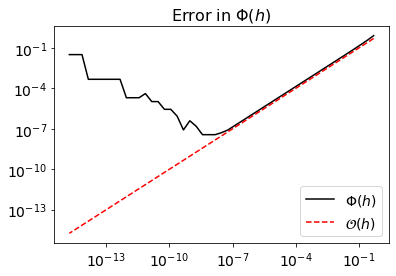

In [2]:
h = 1/2**np.arange(1,50)
f = lambda x: np.exp(x)
alpha = 1
E = np.exp(1)

# Compute the first order estimate and the resulting error
phi = (f(alpha + h)-f(alpha))/h
err = np.abs(E-phi)

plt.loglog(h, err, 'k-', h, h, 'r--')
plt.title('Error in $\Phi(h)$', fontsize = 16)
plt.legend(('$\Phi(h)$', '$\mathcal{O}(h)$'), fontsize = 14)


#### Improved solution using Richardson extrapolation

In [3]:
n = 10
R = np.zeros((n,n), dtype = 'd')
R[:,0] = phi[:n]

for j in range(1,n):
    for k in range(1,j+1):
        R[j,k] = (2**k*R[j,k-1] - R[j-1,k-1])/(2**k-1)


In [4]:
print('Richardson Extrapolation Table')
print(R[:5,:5])

Richardson Extrapolation Table
[[3.52681448 0.         0.         0.         0.        ]
 [3.08824452 2.64967455 0.         0.         0.        ]
 [2.89548016 2.70271581 2.72039623 0.         0.        ]
 [2.80502585 2.71457154 2.71852345 2.71825591 0.        ]
 [2.76120089 2.71737593 2.71831072 2.71828033 2.71828196]]


In [5]:
print('Richardson Extrapolation Errors')
print(np.array_str(np.tril(np.abs(E-R[:5,:5])), precision=2))

Richardson Extrapolation Errors
[[8.09e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [3.70e-01 6.86e-02 0.00e+00 0.00e+00 0.00e+00]
 [1.77e-01 1.56e-02 2.11e-03 0.00e+00 0.00e+00]
 [8.67e-02 3.71e-03 2.42e-04 2.59e-05 0.00e+00]
 [4.29e-02 9.06e-04 2.89e-05 1.50e-06 1.33e-07]]


Text(0.5, 1.0, 'Accuracy of Richardson Extrapolation')

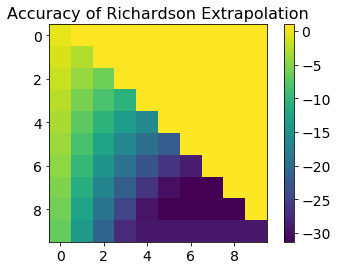

In [6]:
plt.imshow(np.log(np.abs(E-R))); plt.colorbar()
plt.title('Accuracy of Richardson Extrapolation', fontsize = 16)

### Romberg integration

Suppose we use Trapezoidal rule along with Richardson extrapolation to approximate the integral $\int_0^\pi \sin(x) dx.$

In [7]:
f2 = lambda x: np.sin(x)
I2 = 2
print('The true answer is', I2)

The true answer is 2


In [8]:
nlst = 2*(2**np.arange(0,10))
a = 0; b = np.pi

from scipy.integrate import trapz, simps
#Computing first column of Richardson Extrapolation Table
R = np.zeros((10,10), dtype = 'd')
for j,n in enumerate(nlst):
    h = (b-a)/n
    xj = a + np.arange(n+1)*h
    
    #Trapezoidal rule
    R[j,0] = trapz(f2(xj), xj, h)
    
#Computing the rest of the table; notice the new weights
for j in range(1,10):
    for k in range(1,j+1):
        R[j,k] = (4**k*R[j,k-1] - R[j-1,k-1])/(4**k-1)


In [9]:
print('Richardson Extrapolation Table')
print(R[:5,:5])

Richardson Extrapolation Table
[[1.57079633 0.         0.         0.         0.        ]
 [1.8961189  2.00455975 0.         0.         0.        ]
 [1.9742316  2.00026917 1.99998313 0.         0.        ]
 [1.99357034 2.00001659 1.99999975 2.00000002 0.        ]
 [1.99839336 2.00000103 2.         2.         2.        ]]


In [10]:
print('Richardson Extrapolation Errors')
print(np.array_str(np.tril(np.abs(I2-R[:5,:5])), precision=2))

Richardson Extrapolation Errors
[[4.29e-01 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [1.04e-01 4.56e-03 0.00e+00 0.00e+00 0.00e+00]
 [2.58e-02 2.69e-04 1.69e-05 0.00e+00 0.00e+00]
 [6.43e-03 1.66e-05 2.48e-07 1.63e-08 0.00e+00]
 [1.61e-03 1.03e-06 3.81e-09 5.97e-11 3.97e-12]]


Text(0.5, 1.0, 'Accuracy of Romberg integration')

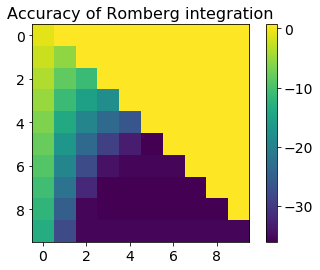

In [11]:
plt.imshow(np.log(np.abs(I2-R))); plt.colorbar()
plt.title('Accuracy of Romberg integration', fontsize = 16)

A better implementation would recognize that we can reuse the information in $\Phi(h/2^j)$ to compute all the intermediate quantities $\Phi(h/2^k)$ for $0 \leq j < k.$


#### Another example

In [20]:
f2 = lambda x: np.sin(x)/(2*x**3)
I2 = 0.1986672988

nlst = 2*(2**np.arange(0,10))
a = 1; b = np.pi

from scipy.integrate import trapz, simps
#Computing first column of Richardson Extrapolation Table
R = np.zeros((10,10), dtype = 'd')
for j,n in enumerate(nlst):
    h = (b-a)/n
    xj = a + np.arange(n+1)*h
    
    #Trapezoidal rule
    R[j,0] = trapz(f2(xj), xj, h)
    
#Computing the rest of the table; notice the new weights
for j in range(1,10):
    for k in range(1,j+1):
        R[j,k] = (4**k*R[j,k-1] - R[j-1,k-1])/(4**k-1)
        
print('Romberg integration Table')
print(R[:5,:5])


print('Romberg integration Errors')
print(np.array_str(np.tril(np.abs(I2-R[:5,:5])), precision=2))

Romberg integration Table
[[0.27817283 0.         0.         0.         0.        ]
 [0.22071316 0.20155994 0.         0.         0.        ]
 [0.20430415 0.19883448 0.19865278 0.         0.        ]
 [0.20000907 0.19857738 0.19856024 0.19855877 0.        ]
 [0.19892123 0.19855861 0.19855736 0.19855731 0.19855731]]
Romberg integration Errors
[[7.95e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.20e-02 2.89e-03 0.00e+00 0.00e+00 0.00e+00]
 [5.64e-03 1.67e-04 1.45e-05 0.00e+00 0.00e+00]
 [1.34e-03 8.99e-05 1.07e-04 1.09e-04 0.00e+00]
 [2.54e-04 1.09e-04 1.10e-04 1.10e-04 1.10e-04]]


Text(0.5, 1.0, 'Accuracy of Romberg integration')

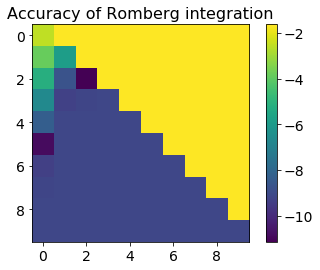

In [13]:
plt.imshow(np.log(np.abs(I2-R))); plt.colorbar()
plt.title('Accuracy of Romberg integration', fontsize = 16)

#### Periodic function

In [17]:
f3 = lambda x: np.sqrt(1-0.36*np.sin(x)**2.)/(2*np.pi)
I3 = 0.90277992777219
a = 0; b = 2*np.pi

from scipy.integrate import trapz, simps
#Computing first column of Richardson Extrapolation Table
R = np.zeros((10,10), dtype = 'd')
for j,n in enumerate(nlst):
    h = (b-a)/n
    xj = a + np.arange(n+1)*h
    
    #Trapezoidal rule
    R[j,0] = trapz(f3(xj), xj, h)
    
#Computing the rest of the table; notice the new weights
for j in range(1,10):
    for k in range(1,j+1):
        R[j,k] = (4**k*R[j,k-1] - R[j-1,k-1])/(4**k-1)
        
print('Romberg integration Table')
print(R[:5,:5])


print('Romberg integration Errors')
print(np.array_str(np.tril(np.abs(I3-R[:5,:5])), precision=2))

Romberg integration Table
[[1.         0.         0.         0.         0.        ]
 [0.9        0.86666667 0.         0.         0.        ]
 [0.90276926 0.90369234 0.90616072 0.         0.        ]
 [0.90277993 0.90278348 0.90272289 0.90266832 0.        ]
 [0.90277993 0.90277993 0.90277969 0.90278059 0.90278103]]
Romberg integration Errors
[[9.72e-02 0.00e+00 0.00e+00 0.00e+00 0.00e+00]
 [2.78e-03 3.61e-02 0.00e+00 0.00e+00 0.00e+00]
 [1.07e-05 9.12e-04 3.38e-03 0.00e+00 0.00e+00]
 [5.45e-10 3.56e-06 5.70e-05 1.12e-04 0.00e+00]
 [3.89e-15 1.82e-10 2.37e-07 6.65e-07 1.10e-06]]


Text(0.5, 1.0, 'Accuracy of Romberg integration')

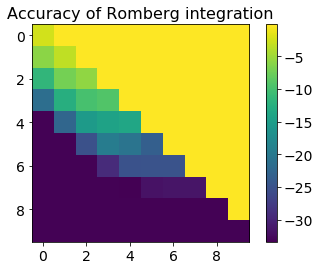

In [18]:
plt.imshow(np.log(np.abs(I3-R))); plt.colorbar()
plt.title('Accuracy of Romberg integration', fontsize = 16)